<a href="https://academics.sheridancollege.ca/programs/computer-engineering-technology"><img src="https://www.sheridancollege.ca/-/media/project/sheridan/shared/images/logos/sheridan-logo-header.svg" width="300" align="center"></a>


<h1><center>AI Application (ENGI51071) - Lab 4 </center></h1>
<h2><center>Student Name(s): Confidence Ahuekwe | Student Number: 991714953 | Date: 15th February, 2024.</center></h2> 

<h3>Lab Overview</h3>
This is part of the lab series for AI Application (ENGI51071). In this lab, we learn how to use Python libary to implement classification algorithms such as KNN and SVM. 

Part of the lab is adapted from scikit-learn.org by Gael Varoquaux <gael dot varoquaux at normalesup dot org>.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#Import_Needed_Packages'>Import Needed Packages</a></li>
        <li><a href='#SVM'>Support Vector Machines</a></li>
        <li><a href='#KNN'>K Nearest Neighbors</a></li>
        <li><a href='#Practice'>Practice</a></li>
    </ol>
</div>
<hr>

<a id='Import_Needed_Packages'></a>
<h2> 1. Import Needed packages </h2>
<h3> For this lab, the following packages are needed </h3><br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes<br>
sklearn: scikit-learn, a commonly used machine learning library. 
seaborn: a Python data visualization library based on matplotlib. It provides a high-level interface for statistical graphics.

In [1]:
# only run this if you don't have seaborn installed
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 328.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 438.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 450.6 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.9 kB 620.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 623.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 623.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 623.6 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 608.3 kB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\user\AppData\Local\Temp\ipykernel_14608\1064136436.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In this part of the lab, we are going to train a classifier to recognize hand-written digits. The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 10 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 10 plots below.<br>

Details of this dataset can be found <a href=https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#digits-datasets>here</a>.

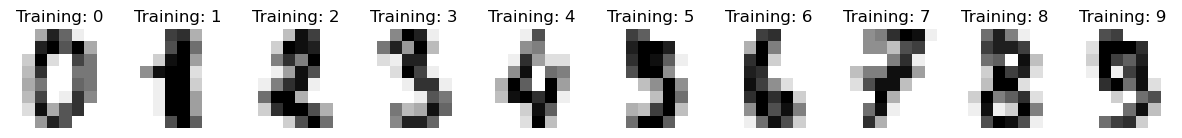

In [2]:
# load sklearn build-in hand-written digits dataset
digits = datasets.load_digits()

# plot the first 10 images from the digits dataset
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

__Question 1__. How many features does this model use? Why? <br>
Please record your answers on lab4 on SLATE quiz tool. <br>
__Ans:__ This model uses 64 features for each sample. This is because the digits dataset consists of 8x8 pixel images of digits, and each pixel is a feature that represents the grayscale value of that pixel. The model flattens each image into a 1D array of length 64, and uses these arrays as the input data for the model. The model then tries to learn the relationship between the features and the target, which is the digit each image represents. <br>

__Question 2__. Where are the labels of these images stored in?<br>
Please record your answers on lab4 on SLATE quiz tool. <br>
__Ans:__ The labels of these images are stored in the target attribute of the digits dataset. The target attribute is a 1D array that contains the digit each image represents. For example, the first image has a label of 0, the second image has a label of 1, and so on. You can access the target attribute by using digits.target

<a id='SVM'></a>
<h2> 2. Support Vector Machine </h2>
<h3> Applying SVM for handwriting recognition </h3><br>
Similar to what we have done in the previous lab, we are going to flatten the images and then use SVM to train a classifier. 

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)


# Create a classifier: a support vector classifier
clf = svm.SVC(C=0.01, gamma=0.1, kernel = 'linear')

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [5]:
print(predicted)

[8 8 4 9 0 8 9 1 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 5 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 9 2 0
 1 2 6 3 3 5 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 8 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 5 4 1 7 7 5 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 8 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 0 3 1 4 0 5 3 

__Task 1__. Now the model is trained and predictions are made, please use the cell below to evaluate if this is a good predictor. Record your code in Lab4 on SLATE quiz tool. 

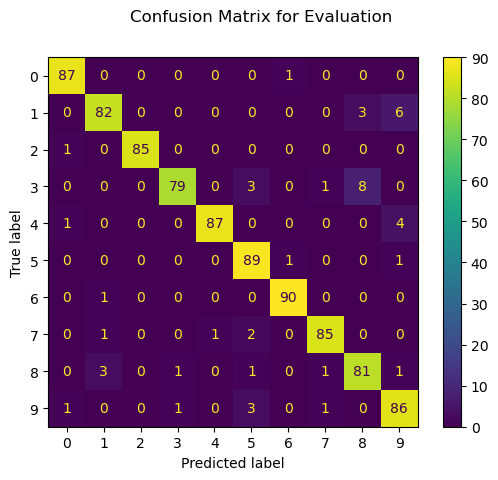

In [6]:
# Please use this cell to test your code. 
# Compute confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix for Evaluation")


plt.show()

In [7]:
#Evaluating if this is a good predictor using The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for g_truth in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [g_truth] * cm[g_truth][pred]
        y_pred += [pred] * cm[g_truth][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n")

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.94      0.90      0.92        91
           2       1.00      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.95      0.97        92
           5       0.91      0.98      0.94        91
           6       0.98      0.99      0.98        91
           7       0.97      0.96      0.96        89
           8       0.88      0.92      0.90        88
           9       0.88      0.93      0.91        92

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899




__Question 3__. Is this a good prediction model? What does recall and precision infer? <br>
Record your answer in Lab4 on SLATE quiz tool. <br>
__Ans:__ Yes, this appears to be a good prediction model. The precision and recall values are high, indicating that the model is performing well. Precision refers to the number of true positive predictions divided by the total number of positive predictions made (true positives + false positives). It indicates how many of the predicted positive instances are actually positive. Recall, on the other hand, is calculated as the number of true positive predictions divided by the total actual positives (true positives + false negatives). It shows how many of the actual positive instances were captured by the model.

<h3> GridSearchCV to optimize your model </h3>


SKlearn also has a very useful tool that allows you to search and find the best combination of hyperparameters to achieve the optimal model result. Here __Hyperparameters__ are referred to those parameters that cannot be directly learned from the data.  Usually these parameters are selected by experts based on intuitions / empirical knowledge or hit and trial before the actural traning begins. In SVM, we also have such __Hyperparameters__ such as gamma and C values. <br>
Finding the optimal hyper-parameter combinations is a very hard task. But it can be found by bruteforce, i.e. testing all possible combinations and see what parameter combo works best. In order to achieve so, Scikit-learn uses a tool called __GridSearchCV__. It uses a grid of hyper-parameter and just try all of their combinations. <br>
GridSearchCV takes a dictionary that enumerates all the possible the parameters that could be used to train a model. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. It then iterates through all different combos to find the optimal parameter combination. Once the optimal combo is found, you will rerun the fit function again to apply the optimal paramters to create the optimal model from the training dataset. <br>
The cell below describes the necessary steps to implement GridSearchCV. 

### h

In [8]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of possible parameters
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.01, 0.1],
          'kernel':['linear','rbf'] }

# Create the GridSearchCV object
grid_clf = GridSearchCV(estimator=svm.SVC(), param_grid=params_grid, refit = True)

# Fit the data with the best possible parameters
grid_clf.fit(X_train, y_train)

# Print the best estimator with it's parameters
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)

# Predict labels with the best possible estimator and its parameters
predicted = grid_clf.predict(X_test)

SVC(C=10, gamma=0.001)
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


__Question 4__. In order to find the best hyperparameters, how many different combinations does this GridSearch completed? <br>
Please record your answers on lab4 on SLATE quiz tool. <br>
__Ans:__ values for C = 6, values for gamma = 4, values for kernel = 2. <br>
GridSearchCV completed = 6 x 4 x 2 = 48. <br>
Therefore, GridSearchCV completed 48 combinations of hyperparameters for the svm.SVC estimator.

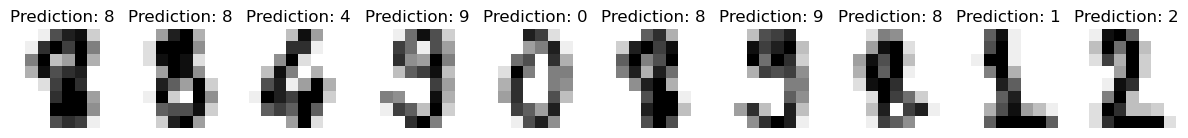

In [9]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
print(
    f"Classification report for classifier {grid_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']}):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97      

Text(0.5, 1.0, 'Confusion Matrix')

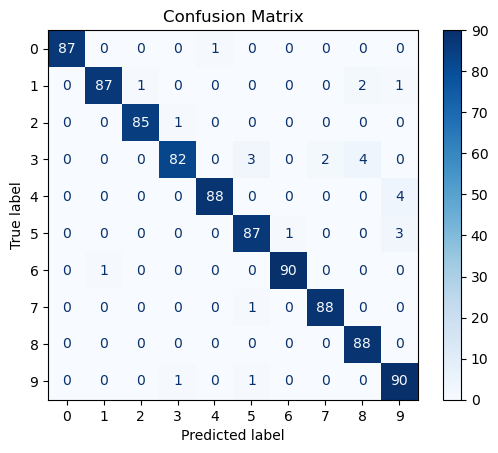

In [11]:
confusion_mat = confusion_matrix(y_test, predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")


<a id='KNN'></a>
<h2> 3. K Nearest Neighbors </h2>
<h3> Applying SVM for handwriting recognition </h3><br>
Similar to what we have done in the previous lab, we are going to flatten the images and ten using SVM to train a classifier.

In [12]:
# Split data into 50% train and 50% test subsets

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size = 0.5, shuffle=False)

K = []
training = []
test = []
scores = {}

for k in range(2, 25):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9899777282850779, 0.9599555061179088]
3 : [0.9922048997772829, 0.9632925472747497]
4 : [0.9899777282850779, 0.9543937708565072]
5 : [0.9888641425389755, 0.9555061179087876]
6 : [0.9899777282850779, 0.9532814238042269]
7 : [0.9866369710467706, 0.9521690767519466]
8 : [0.9866369710467706, 0.9532814238042269]
9 : [0.987750556792873, 0.949944382647386]
10 : [0.9855233853006682, 0.9532814238042269]
11 : [0.9844097995545658, 0.9488320355951056]
12 : [0.9821826280623608, 0.9488320355951056]
13 : [0.9810690423162584, 0.9410456062291435]
14 : [0.9810690423162584, 0.9454949944382648]
15 : [0.9788418708240535, 0.9421579532814238]
16 : [0.977728285077951, 0.9443826473859844]
17 : [0.9755011135857461, 0.9432703003337041]
18 : [0.9721603563474388, 0.9477196885428254]
19 : [0.9710467706013363, 0.9454949944382648]
20 : [0.9710467706013363, 0.9443826473859844]
21 : [0.9721603563474388, 0.9421579532814238]
22 : [0.9710467706013363, 0.9432703003337041]
23 : [0.9665924276169265, 0.9410456062291435]

__Question 5__. What is the score method in KNeighborsClassifier stands for?  Please conduct your own research and answer this question in Lab4 quiz.<br>
__Ans:__ The score method in KNeighborsClassifier stands for the mean accuracy score of the model on the given data and labels. It is a shortcut for producing predictions on the data and computing the accuracy score against the labels. It returns a float value between 0 and 1, where 0 means no correct predictions and 1 means all correct predictions.

__Question 6__. The following two cells plot the reported scores based on the different k used in the training.  Based on these two plot, what is the optimal k, and why? <br>
__Ans:__ The optimal k is 7. <br>
The plot shows that as k increases from 2 to 7, both scores increase, indicating that the model is learning better from the data and generalizing well to new data. However, as k increases beyond 7, the training score decreases, indicating that the model is underfitting the data and losing accuracy. The test score also decreases slightly, indicating that the model is not performing as well on unseen data. Therefore, k=7 is the optimal value that balances the trade-off between overfitting and underfitting.

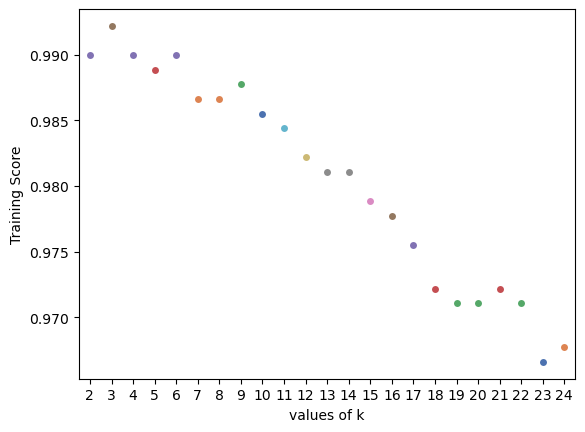

In [13]:
ax = sns.stripplot(x=K, y=training, hue=training, palette='deep',legend=False);
ax.set(xlabel ='values of k', ylabel ='Training Score')
plt.show()

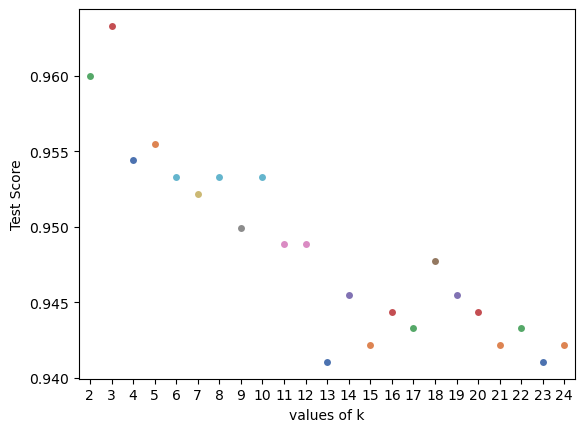

In [14]:
ax = sns.stripplot(x=K, y=test, hue=test, palette='deep',legend=False);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

__Task 2__. Now based on the best selected k, please create an optimal KNN model to classify handwriting. Record your code and results on SLATE lab4. 

New KNN Training using K=7:  0.967706013363029
Accuracy for new KNN using K=7: 0.9421579532814238


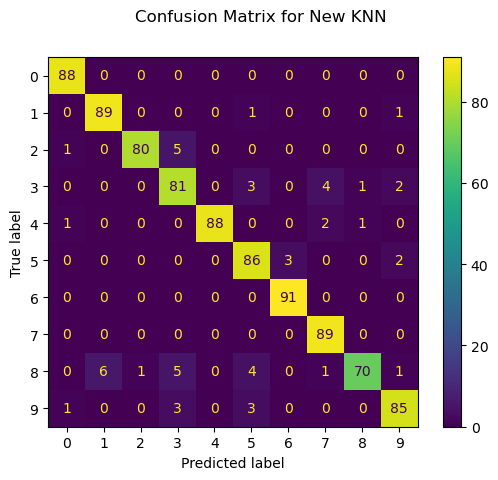

In [15]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size = 0.5, shuffle=False)

K = 7
# Create a KNN classifier with k=7
clf2 = KNeighborsClassifier(n_neighbors = k)

# Fit the classifier on the training data
clf2.fit(X_train, y_train)

training2 = clf2.score(X_train, y_train)
test2 = clf2.score(X_test, y_test)

# Predict the labels of the test data
y_pred = clf2.predict(X_test)

print("New KNN Training using K=7: ", training2)


# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for new KNN using K=7: {accuracy}")

# Compute confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix for New KNN")


plt.show()

<a id='Practice'></a>
<h2>4. Practice </h2>

__Task 3__:  Obviously KNN can benefit from using GridSearchCV as well, please use the cell below to create an optimal classifier with the help of GridSearchCV, please compare with the decision you made in question 6. 

In [19]:


# Define a dictionary of possible parameters for the KNN model
params_grid = {'n_neighbors': range(2, 25),
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan', 'minkowski']}

# Create a GridSearchCV object with the KNN model as the estimator
grid_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid=params_grid,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_clf.fit(X_train, y_train)

# Print the best parameters and the best score

print(f"Best parameters: {grid_clf.best_params_}")
print(f"Best score: {grid_clf.best_score_}")

# Predict the labels of the test data using the best estimator
y_pred = grid_clf.best_estimator_.predict(X_test)

# Evaluate the performance of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Best parameters: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
Best score: 0.9499255121042829
Accuracy: 0.9610678531701891


Comparing with my answer in Question 6, I can deduced that the GridSearchCv selected 2 as the optimal k with Best Score of 0.9499 and Accuracy of 0.961, whereas I  choosed 7 as the optimal k in Question 6.<br>
The GridSearchCV result only shows the best parameters and the best score, but it does not show how the scores change with different values of k. The plot in Question 6 shows that k=7 is the point where both the training and test scores are highest, which means that the model is neither overfitting nor underfitting. The GridSearchCV result shows that k=2 is the best value, but it does not show how much the scores differ from k=7. The difference could be very small or insignificant, and it could also vary depending on the cross-validation method or the test set used.